In [1]:
# nadam_optimizer.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Nadam
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time
from sklearn.model_selection import train_test_split


In [2]:

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ensure labels are integers (no one-hot encoding)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print (X_train.shape )
print (X_test.shape )

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# Create model function
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Nadam optimizer
optimizer = Nadam(learning_rate=0.001)

In [4]:

# Train and evaluate model
start_time = time.time()
model = create_model(optimizer)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=1)
end_time = time.time()

# Record training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")



Epoch 1/50
625/625 [==============================] - 10s 14ms/step - loss: 1.9437 - accuracy: 0.3023 - val_loss: 1.7984 - val_accuracy: 0.3550
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 1.7543 - accuracy: 0.3741 - val_loss: 1.7134 - val_accuracy: 0.3882
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 1.6829 - accuracy: 0.4013 - val_loss: 1.6866 - val_accuracy: 0.3963
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 1.6408 - accuracy: 0.4199 - val_loss: 1.6530 - val_accuracy: 0.4027
Epoch 5/50
625/625 [==============================] - 5s 7ms/step - loss: 1.6085 - accuracy: 0.4316 - val_loss: 1.6087 - val_accuracy: 0.4271
Epoch 6/50
625/625 [==============================] - 5s 9ms/step - loss: 1.5837 - accuracy: 0.4371 - val_loss: 1.5868 - val_accuracy: 0.4314
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 1.5628 - accuracy: 0.4443 - val_loss: 1.5824 - val_accuracy: 0.4381
Ep

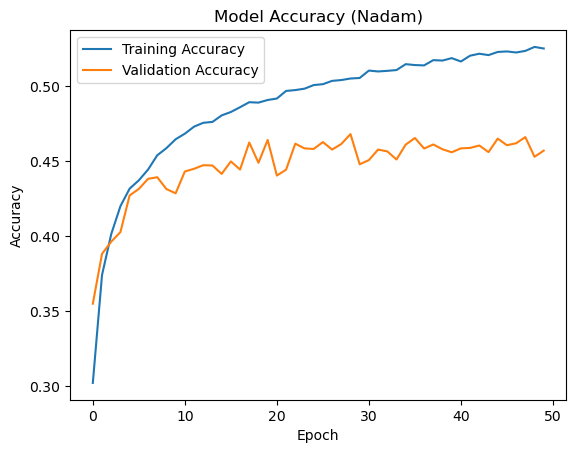

313/313 [==============================] - 2s 6ms/step


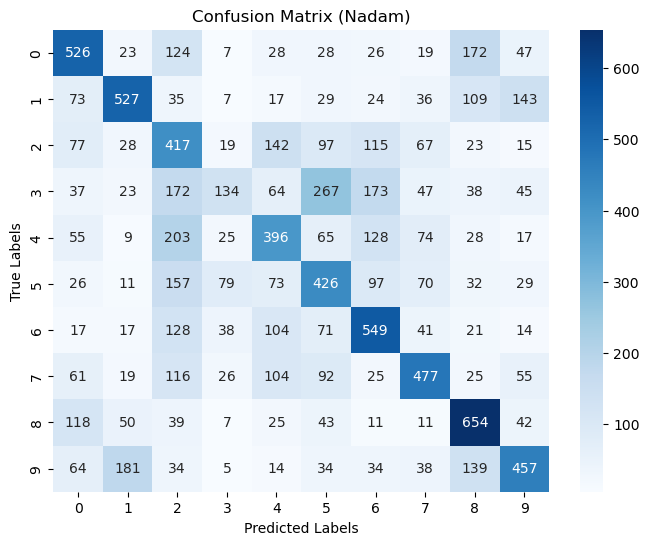

In [7]:

# Plot training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy (Nadam)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (Nadam)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

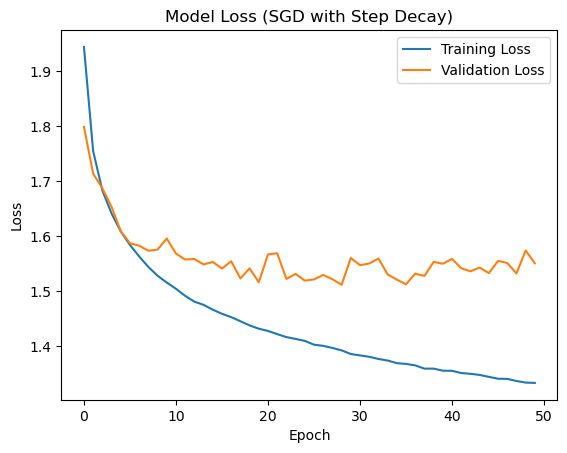

In [6]:
# Plot training and validation accuracy
accuracy = history.history['loss']
val_accuracy = history.history['val_loss']
plt.plot(accuracy, label='Training Loss')
plt.plot(val_accuracy, label='Validation Loss')
plt.title('Model Loss (SGD with Step Decay)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()